## PCA (Dimensionality Reduction) + K-Means: Ookla vs Urbanization

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pylab as pl
import seaborn as sns
from sklearn import datasets
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Load Cleaned Data 

In [21]:
data = pd.read_csv("final data for clustering.csv").set_index('Region')
data

,Unnamed: 0,Tests (Q1-2019),Devices (Q1-2019),Ave Latency(ms) (Q1-2019),Ave Download(Mbps) (Q1-2019),Ave Upload(Mbps) (Q1-2019),Tests (Q1-2020),Devices (Q1-2020),Ave Latency(ms) (Q1-2020),Ave Download(Mbps) (Q1-2020),...,Ave Download(Mbps) (Q4-2020),Ave Upload(Mbps) (Q4-2020),Smart 2019,Smart 2020,Globe 2019,Globe 2020,Total Population as of May 2020,Level of Urbanization (%),Daily Minimum Wage (Php),Surface Area (km^2)
Region,,,,,,,,,,,,,,,,,,,,,
ARMM,0,1295,493,78.089362,9.425894,5.965306,3165,917,60.174263,8.484839,...,7.108765,5.169553,82,88,190,258,4404288,13.7,325,12535.79
CAR,1,3859,2048,68.593258,9.801103,5.639625,6241,2983,51.034591,10.762159,...,8.091913,4.459382,493,545,253,337,1797660,26.3,350,19422.03
NCR,2,114782,58942,45.545124,18.043558,7.663277,186271,85129,32.774387,19.723741,...,28.887553,6.562790,6270,6973,2561,3746,13484462,100.0,537,619.57
Region I,3,7871,4058,60.132345,12.059348,6.199840,13920,6130,42.431923,11.884861,...,12.259604,4.932170,1287,1420,691,1100,5301139,12.7,340,13012.60
Region II,4,4023,2062,65.253389,11.184127,5.790260,6598,3216,42.239628,13.033006,...,10.890773,5.177189,699,822,480,773,3685744,11.6,370,28228.83
Region III,5,30432,16175,57.798584,13.126023,6.716969,57651,24935,45.033558,12.656666,...,14.219295,5.146316,2914,3588,1094,1506,12422172,51.6,420,22014.63
Region IV-A,6,45180,22877,55.917223,12.265577,6.333098,90533,36087,44.157556,12.793386,...,14.223361,4.909055,3566,4277,1882,2496,16195042,59.7,400,16873.31
Region IV-B,7,2833,1174,64.475046,10.792100,5.329701,5195,1949,57.045894,12.005827,...,10.162448,5.668466,494,606,665,767,3228558,22.3,320,29620.90
Region IX,8,2527,1224,69.071560,12.498095,6.725895,4825,2175,46.782178,13.000708,...,10.746596,6.254332,623,714,378,521,3875576,33.9,316,17056.73


### Transpose data and check for descriptive statistics

In [22]:
data.T.describe()

Region,ARMM,CAR,NCR,Region I,Region II,Region III,Region IV-A,Region IV-B,Region IX,Region V,Region VI,Region VII,Region VIII,Region X,Region XI,Region XII,Region XIII
count,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
mean,9.160247e+04,4.147985e+04,3.251969e+05,1.149204e+05,8.015392e+04,2.915795e+05,3.951098e+05,6.817134e+04,8.165856e+04,1.288621e+05,1.695322e+05,1.757559e+05,9.650892e+04,1.077110e+05,1.143008e+05,1.047778e+05,6.061313e+04
std,6.289527e+05,2.566433e+05,1.921434e+06,7.565630e+05,5.260244e+05,1.774527e+06,2.317628e+06,4.609223e+05,5.533136e+05,8.682773e+05,1.135441e+06,1.153161e+06,6.491047e+05,7.169125e+05,7.482097e+05,6.997226e+05,4.003300e+05
min,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,4.909055e+00,5.329701e+00,6.124135e+00,4.268186e+00,5.013648e+00,5.292418e+00,4.654192e+00,6.000936e+00,5.272263e+00,5.064916e+00,5.506749e+00
25%,8.055386e+00,9.801103e+00,1.972374e+01,1.205935e+01,1.098062e+01,1.272977e+01,1.279339e+01,1.070062e+01,1.249810e+01,1.016177e+01,1.000000e+01,1.100000e+01,9.056335e+00,1.277976e+01,1.133647e+01,9.906215e+00,1.222688e+01
50%,7.808936e+01,6.688863e+01,4.554512e+01,5.276945e+01,5.871888e+01,5.163162e+01,5.591722e+01,6.367823e+01,6.907156e+01,6.780828e+01,7.090999e+01,6.017609e+01,7.727755e+01,6.458807e+01,6.439108e+01,7.656134e+01,6.419388e+01
75%,1.152000e+03,3.226000e+03,7.695100e+04,7.505000e+03,4.023000e+03,2.493500e+04,3.608700e+04,2.474000e+03,2.527000e+03,5.021000e+03,1.005100e+04,1.625800e+04,3.900000e+03,4.717000e+03,8.166000e+03,2.699000e+03,2.098000e+03
max,4.404288e+06,1.797660e+06,1.348446e+07,5.301139e+06,3.685744e+06,1.242217e+07,1.619504e+07,3.228558e+06,3.875576e+06,6.082165e+06,7.954723e+06,8.081988e+06,4.547150e+06,5.022768e+06,5.243536e+06,4.901486e+06,2.804788e+06


### Scale the data. This step is necessary for the the learning models we are going to use.

In [23]:
scaled_data = StandardScaler().fit_transform(data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-1.632993,-0.549533,-0.551065,1.326504,-1.132989,0.083631,-0.572794,-0.572398,1.214682,-1.288361,...,-1.026519,-0.662269,-0.887637,-0.902264,-0.913580,-0.896112,-0.514066,-0.971292,-0.751852,-1.006227
1,-1.428869,-0.455239,-0.440055,0.205424,-0.941793,-0.414018,-0.504995,-0.470912,0.101565,-0.363518,...,-0.814516,-1.961291,-0.613446,-0.635472,-0.809279,-0.804314,-1.180911,-0.417818,-0.297964,0.076350
2,-1.224745,3.624062,3.621558,-2.515565,3.258311,2.678172,3.463112,3.564238,-2.122337,3.275872,...,3.669797,1.886197,3.240568,3.117128,3.011765,3.156967,1.808884,2.819562,3.097117,-2.879562
3,-1.020621,-0.307694,-0.296563,-0.793445,0.208939,0.442004,-0.335739,-0.316326,-0.946150,0.092423,...,0.084193,-1.096483,-0.083745,-0.124656,-0.084142,0.082297,-0.284628,-1.015218,-0.479519,-0.931269
4,-0.816497,-0.449208,-0.439056,-0.188870,-0.237046,-0.183844,-0.497126,-0.459467,-0.969569,0.558696,...,-0.210978,-0.648302,-0.476017,-0.473763,-0.433466,-0.297679,-0.697889,-1.063537,0.065146,1.460857
5,-0.612372,0.522009,0.568459,-1.068961,0.752484,1.232190,0.628152,0.607407,-0.629298,0.405860,...,0.506775,-0.704774,1.001677,1.141000,0.583051,0.554072,1.537122,0.693521,0.972922,0.483930
6,-0.408248,1.064381,1.046909,-1.291068,0.314027,0.645625,1.352916,1.155212,-0.735986,0.461384,...,0.507652,-1.138764,1.436646,1.543231,1.887637,1.704458,2.502322,1.049326,0.609812,-0.324331
7,-0.204124,-0.492971,-0.502449,-0.280759,-0.436812,-0.887590,-0.528050,-0.521704,0.833679,0.141548,...,-0.368032,0.250328,-0.612779,-0.599861,-0.127186,-0.304651,-0.814849,-0.593524,-0.842629,1.679702
8,0.000000,-0.504225,-0.498880,0.261891,0.432512,1.245830,-0.536206,-0.510603,-0.416334,0.545579,...,-0.242068,1.321975,-0.526719,-0.536812,-0.602334,-0.590504,-0.649325,-0.083977,-0.915252,-0.295496
9,0.204124,-0.412505,-0.415783,0.570631,-0.461256,-1.500218,-0.421701,-0.408872,0.408677,-0.676282,...,-0.311368,0.082903,-0.422647,-0.399037,-0.277843,-0.338349,-0.084821,-0.901009,-1.024185,-0.122709


### Select all Ookla columns from our scaled data. Our goal is to reduce its 40 columns to 1 column. 

In [24]:
ookla = scaled_data.iloc[:,:-8]
ookla

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-1.632993,-0.549533,-0.551065,1.326504,-1.132989,0.083631,-0.572794,-0.572398,1.214682,-1.288361,...,-0.585990,-0.571548,1.138921,-1.803079,-1.409733,-0.618329,-0.601137,1.466307,-1.026519,-0.662269
1,-1.428869,-0.455239,-0.440055,0.205424,-0.941793,-0.414018,-0.504995,-0.470912,0.101565,-0.363518,...,-0.495604,-0.450723,-0.690940,-0.408219,-0.260698,-0.577409,-0.537953,0.181083,-0.814516,-1.961291
2,-1.224745,3.624062,3.621558,-2.515565,3.258311,2.678172,3.463112,3.564238,-2.122337,3.275872,...,3.570635,3.617147,-1.914215,3.045082,1.318758,3.262863,3.309131,-2.123002,3.669797,1.886197
3,-1.020621,-0.307694,-0.296563,-0.793445,0.208939,0.442004,-0.335739,-0.316326,-0.946150,0.092423,...,-0.328197,-0.298460,-0.860901,0.436993,1.015814,-0.392845,-0.355071,-1.100551,0.084193,-1.096483
4,-0.816497,-0.449208,-0.439056,-0.188870,-0.237046,-0.183844,-0.497126,-0.459467,-0.969569,0.558696,...,-0.489265,-0.455357,0.103625,0.558421,1.923118,-0.510774,-0.466134,-0.588327,-0.210978,-0.648302
5,-0.612372,0.522009,0.568459,-1.068961,0.752484,1.232190,0.628152,0.607407,-0.629298,0.405860,...,0.556517,0.558927,-0.779963,0.766852,1.304380,0.732744,0.748551,-1.300366,0.506775,-0.704774
6,-0.408248,1.064381,1.046909,-1.291068,0.314027,0.645625,1.352916,1.155212,-0.735986,0.461384,...,1.124944,1.045805,-0.905810,0.606777,0.322260,1.658650,1.623545,-1.094805,0.507652,-1.138764
7,-0.204124,-0.492971,-0.502449,-0.280759,-0.436812,-0.887590,-0.528050,-0.521704,0.833679,0.141548,...,-0.556058,-0.521224,-0.748241,-0.412313,0.474175,-0.571895,-0.549364,-0.439696,-0.368032,0.250328
8,0.000000,-0.504225,-0.498880,0.261891,0.432512,1.245830,-0.536206,-0.510603,-0.416334,0.545579,...,-0.525602,-0.502924,0.826083,-0.173779,0.100379,-0.555477,-0.543506,0.244906,-0.242068,1.321975
9,0.204124,-0.412505,-0.415783,0.570631,-0.461256,-1.500218,-0.421701,-0.408872,0.408677,-0.676282,...,-0.428582,-0.408434,-0.478844,-0.522326,0.281125,-0.388908,-0.355884,-0.119269,-0.311368,0.082903


### Perform PCA and plot the explained variances to determine if this method can be used to reduce the features.  

In [25]:
pca = PCA(n_components=17)
principalComponents = pca.fit_transform(ookla)

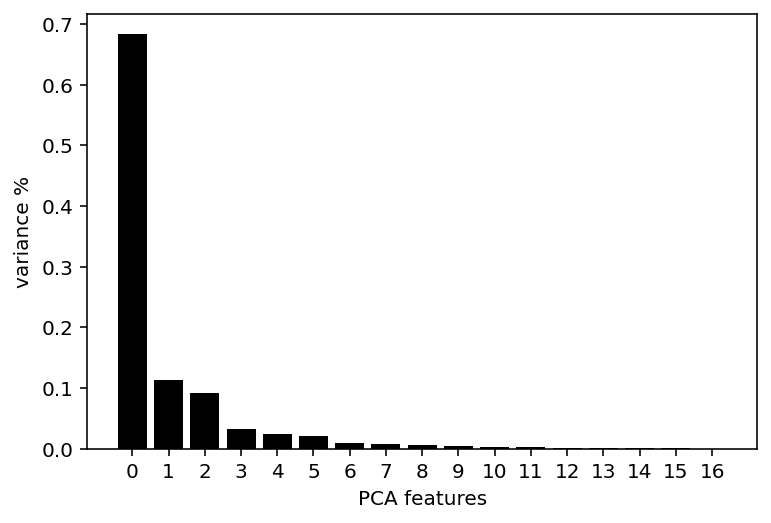

In [26]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

### The explained variance for PCA[0] or first variance can be seen as approx 70%. We are going to use this 1 dimension together with another attribute and perform Kmeans to cluster the combined data

### Select the PCA feature from the previous step vs the column that corresponds to Wage. Make sure the both columns are scaled. 

In [27]:
for_km = pd.DataFrame(columns = ['Ookla Data Reduced Dimension', 'Urbanization'])
for_km['Ookla Data Reduced Dimension'] = PCA_components[0]
for_km['Urbanization'] = scaled_data.iloc[:,-3]
for_km

,Ookla Data Reduced Dimension,Urbanization
0,-5.482998,-0.971292
1,-3.004956,-0.417818
2,17.427387,2.819562
3,1.045992,-1.015218
4,-0.098454,-1.063537
5,4.653462,0.693521
6,6.364949,1.049326
7,-1.831834,-0.593524
8,-0.876031,-0.083977
9,-2.504216,-0.901009


### Using elbow method, check for possible values of K. We used k=4 for this project.

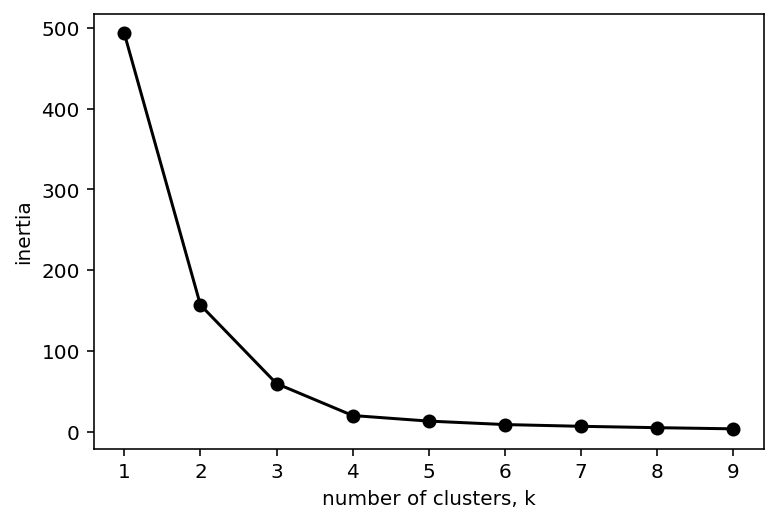

In [28]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(for_km)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Fit the columns to the model

In [29]:
model = KMeans(n_clusters = 4 )
model.fit(for_km)
model.labels_

array([3, 3, 1, 0, 0, 2, 2, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0])

### Plot the result of K-means clustering and assign cluster values

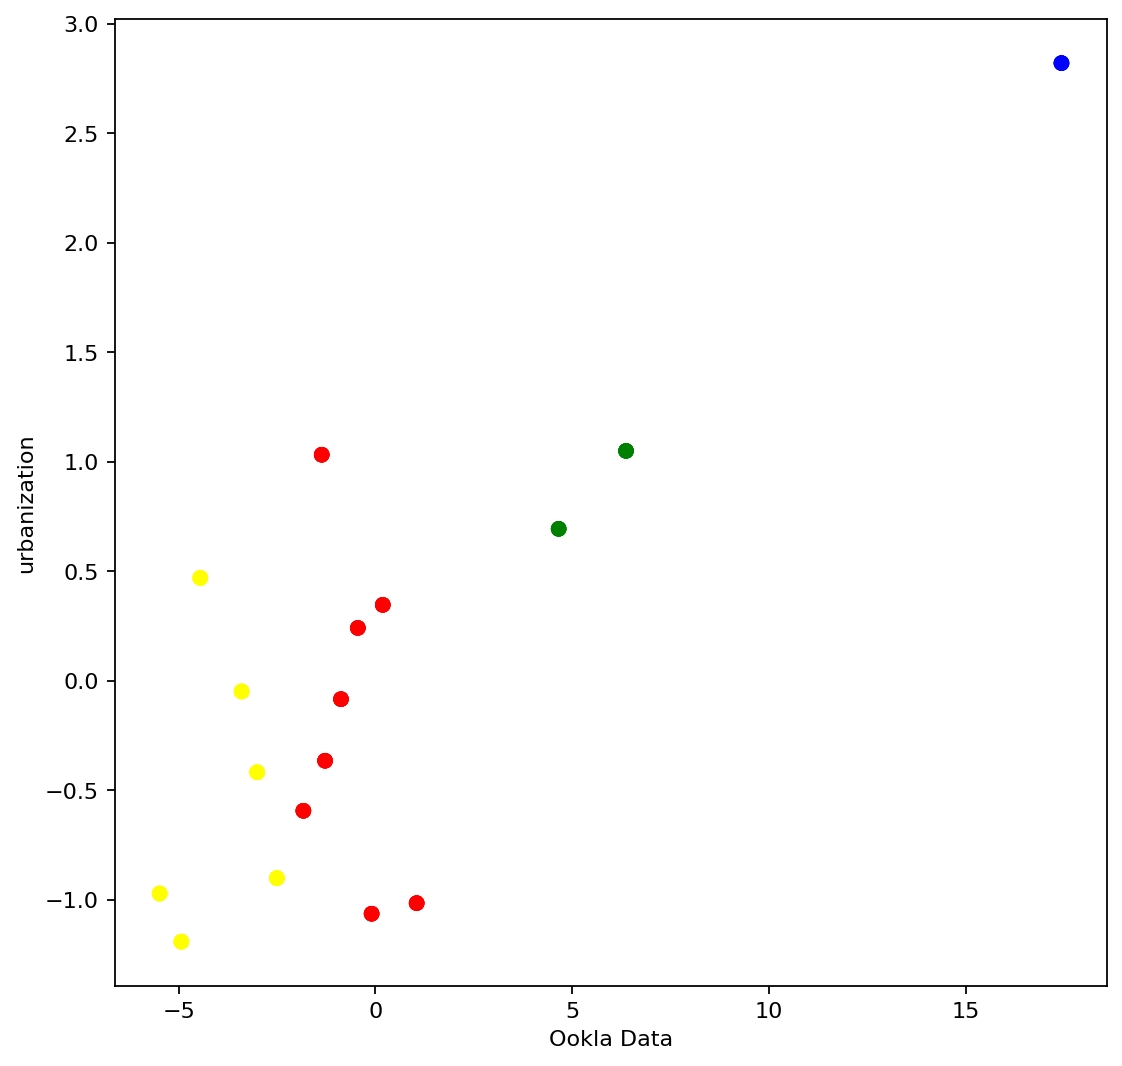

In [30]:

colormap = np.array(['Red', 'Blue', 'Green', 'Yellow'])
plt.figure(figsize=(8, 8), dpi=80)
for color in ['0', '1', '2', '3']:
    plt.scatter(PCA_components[0], scaled_data.iloc[:,-3], c = colormap[model.labels_], label=color)  

plt.xlabel('Ookla Data')
plt.ylabel('urbanization')

plt.show()

### Save the clustering result in a CSV.

In [31]:
df = pd.DataFrame(columns = ['Region', 'Cluster'])
df['Region'] = data.index
df['Cluster'] = model.labels_
df.to_csv('ookla_urban_clustered')